In [1]:
from lib.data import *

data, raw = get_default_oec_rca_raw_data()

Se cargaron los datos desde ../data/default_oce_2018-2020.pkl


In [2]:
import economic_complexity as ecplx

rca = ecplx.rca(data)
M = build_M_from(rca)

In [3]:
#from informe import SimuladorEstatico, SimuladorDinamico, SimuladorComplejo, PaisNaive
from informe import *
from lib.utils import correr_simulacion_mostrando, cantidad_descubrimientos_iteracion

In [4]:
estatico = SimuladorEstatico(lambda step: step > 4, PaisNaive, M.copy(deep=True), 0.4)
dinamico = SimuladorDinamico(lambda step: step > 4, PaisNaive, M.copy(deep=True), 0.4)
cigarras = SimuladorComplejo(lambda step: step > 25, PaisCigarra, M.copy(deep=True), 0.4)
hormigas = SimuladorComplejo(lambda step: step > 25, PaisHormiga, M.copy(deep=True), 0.4)

historia_estatico = correr_simulacion_mostrando(estatico, False)
historia_dinamico = correr_simulacion_mostrando(dinamico, False)
historia_cigarras = correr_simulacion_mostrando(cigarras, False)
historia_hormigas = correr_simulacion_mostrando(hormigas, False)
cant_paises = len(M.index.to_list())

cant_des1 = cantidad_descubrimientos_iteracion(historia_estatico)
cant_des2 = cantidad_descubrimientos_iteracion(historia_dinamico)
cant_des3 = cantidad_descubrimientos_iteracion(historia_cigarras)
cant_des4 = cantidad_descubrimientos_iteracion(historia_hormigas)

proximidad calculada en: 0.12530183792114258
paises creados en: 0.0008175373077392578
proximidad calculada en: 0.1317729949951172
paises creados en: 0.00017833709716796875
proximidad calculada en: 0.1730046272277832
paises creados en: 0.014605998992919922
proximidad calculada en: 0.1850879192352295
paises creados en: 0.014271020889282227


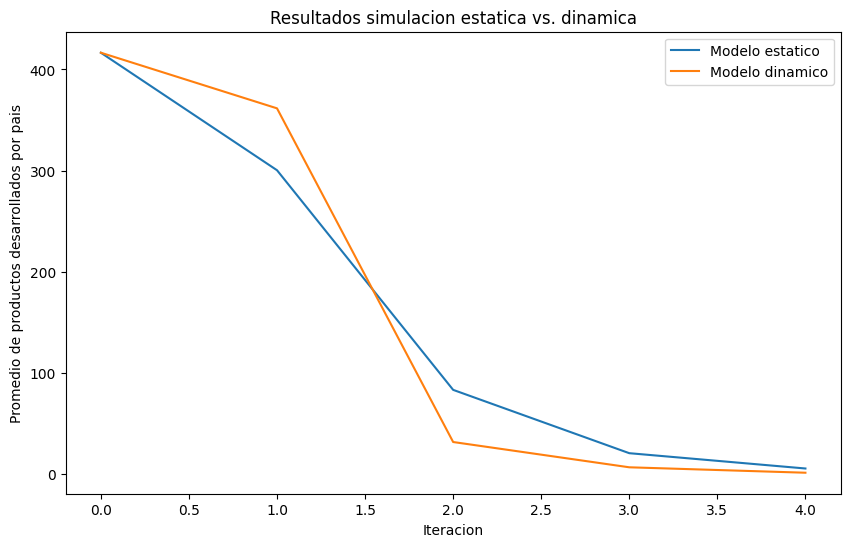

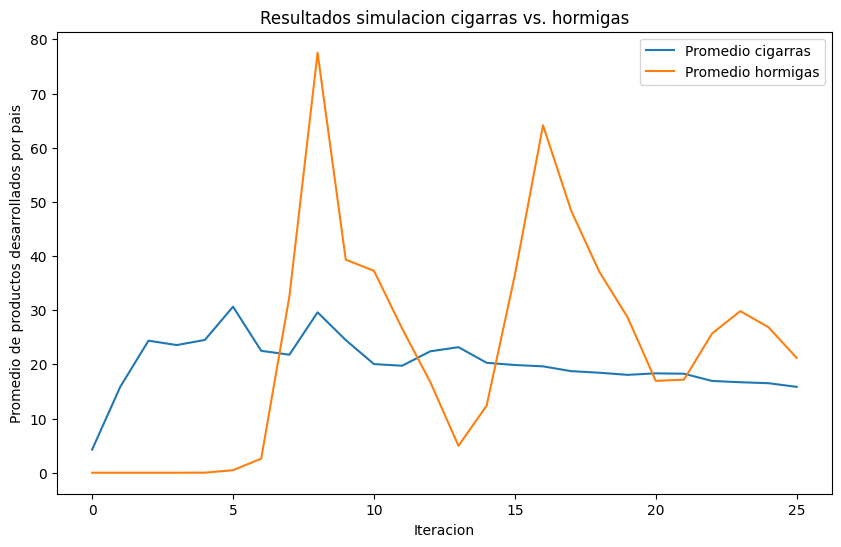

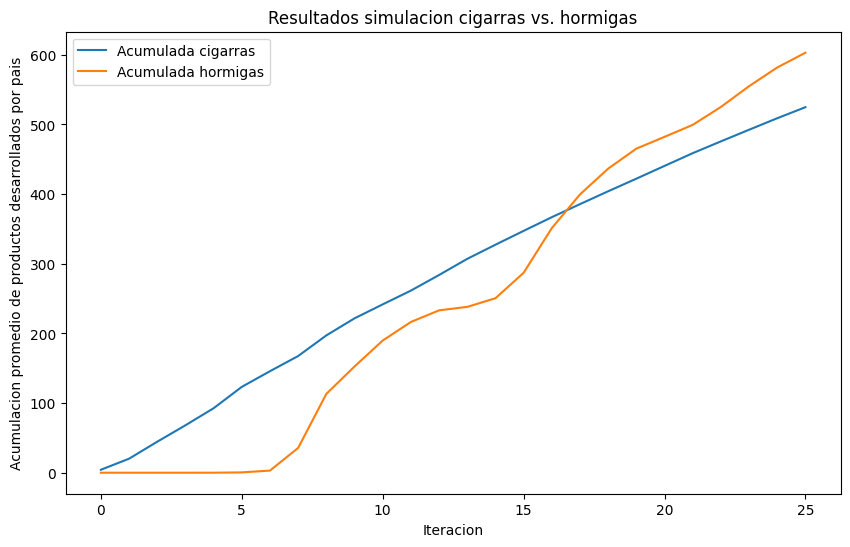

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(range(len(historia_estatico)), cant_des1 / cant_paises, label='Modelo estatico')
plt.plot(range(len(historia_dinamico)),cant_des2 / cant_paises, label='Modelo dinamico')
plt.xlabel('Iteracion')
plt.ylabel('Promedio de productos desarrollados por pais')
plt.title('Resultados simulacion estatica vs. dinamica')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(historia_cigarras)), cant_des3 / cant_paises, label='Promedio cigarras')
plt.plot(range(len(historia_hormigas)), cant_des4 / cant_paises, label='Promedio hormigas')
plt.xlabel('Iteracion')
plt.ylabel('Promedio de productos desarrollados por pais')
plt.title('Resultados simulacion cigarras vs. hormigas')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot( range(len(historia_cigarras)), np.cumsum( cant_des3 / cant_paises ), label='Acumulada cigarras')
plt.plot( range(len(historia_hormigas)), np.cumsum( cant_des4 / cant_paises ), label='Acumulada hormigas')
plt.xlabel('Iteracion')
plt.ylabel('Acumulacion promedio de productos desarrollados por pais')
plt.title('Resultados simulacion cigarras vs. hormigas')
plt.legend()
plt.show()